# Interpetting and Evaluating Naive Bayes

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
iris_df = sns.load_dataset('iris')

In [2]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris_df[['sepal_length', 'sepal_width',
                                                            'petal_length', 'petal_width',]],
                                                   iris_df['species'],
                                           test_size=.5, random_state=0)

In [4]:
type(X_train)

pandas.core.frame.DataFrame

In [5]:
gnb= GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [6]:
gnb.__dict__

{'priors': None,
 'var_smoothing': 1e-09,
 'feature_names_in_': array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
       dtype=object),
 'n_features_in_': 4,
 'classes_': array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 'epsilon_': 3.6399039999999994e-09,
 'theta_': array([[4.97586207, 3.35862069, 1.44827586, 0.23448276],
        [5.935     , 2.71      , 4.185     , 1.3       ],
        [6.77692308, 3.09230769, 5.73461538, 2.10769231]]),
 'var_': array([[0.10321047, 0.13208086, 0.01629013, 0.00846612],
        [0.256275  , 0.0829    , 0.255275  , 0.046     ],
        [0.38869823, 0.10147929, 0.31303255, 0.04763314]]),
 'class_count_': array([29., 20., 26.]),
 'class_prior_': array([0.38666667, 0.26666667, 0.34666667])}

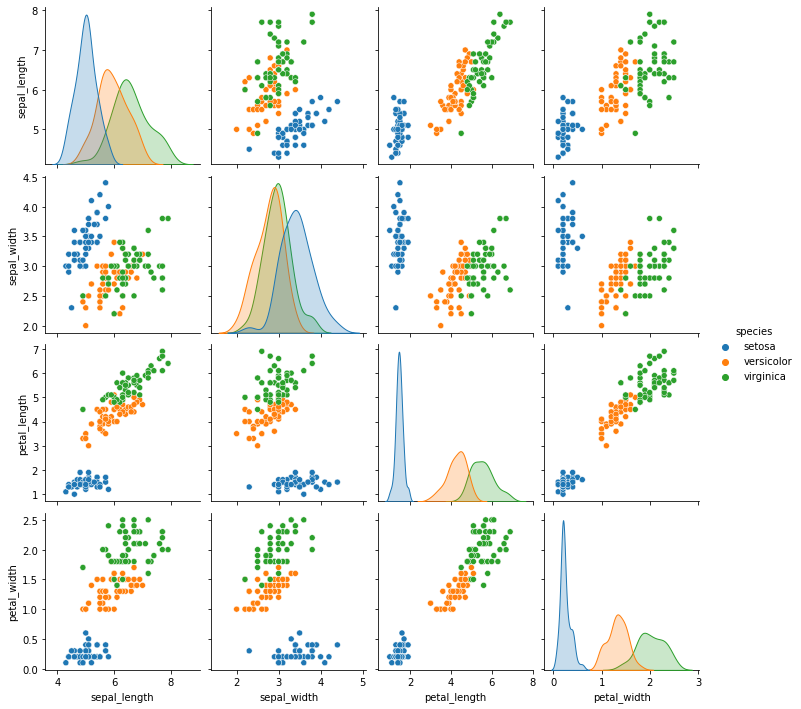

In [7]:
sns.pairplot(data=iris_df, hue='species')

/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


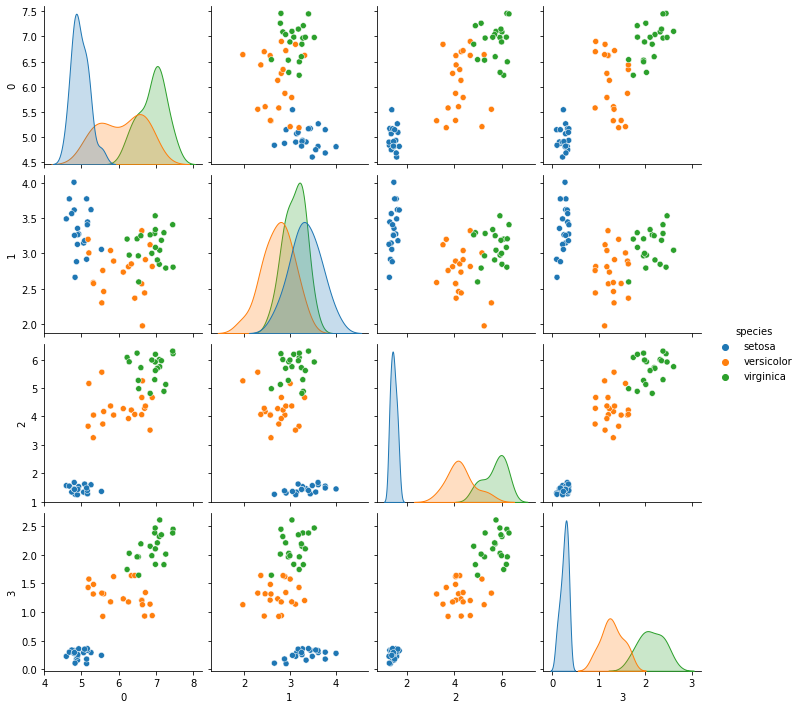

In [8]:
gnb_df = pd.DataFrame(np.concatenate([np.random.multivariate_normal(mu, sig*np.eye(4),20)
                 for mu, sig in zip(gnb.theta_,gnb.sigma_)]))
gnb_df['species'] = [ci for cl in [[c]*20 for c in gnb.classes_] for ci in cl]
sns.pairplot(data =gnb_df, hue='species')

In [9]:
y_pred = gnb.predict(X_test)

In [10]:
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'setosa', 'virginica

In [11]:
sum(y_pred == y_test)

71

In [12]:
len(y_test)

75

In [13]:
gnb.score(X_test,y_test)

0.9466666666666667

In [14]:
71/75

0.9466666666666667

In [15]:
confusion_matrix(y_test, y_pred,labels = gnb.classes_)

array([[21,  0,  0],
       [ 0, 30,  0],
       [ 0,  4, 20]])

In [16]:
gnb.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        21
  versicolor       0.88      1.00      0.94        30
   virginica       1.00      0.83      0.91        24

    accuracy                           0.95        75
   macro avg       0.96      0.94      0.95        75
weighted avg       0.95      0.95      0.95        75

